### Main file

In [1]:
import numpy as np 
from tools.srbm_experimental import *           # !!! Importing the experimental SRBM model !!!
from tools.functions import *
import matplotlib.pyplot as plt

date_str = str(datetime.datetime.now())[0:10]
date_time_str = str(datetime.datetime.now())[0:10]+"_"+str(datetime.datetime.now())[11:16]

/opt/homebrew/Caskroom/miniconda/base/envs/jupyt-tf/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
'''Load data that has been generated with "generate_data.py".
The file will be named according to the following pattern:  
data + number of classes + variation in prototype + variation in prototype replications + length stimuli + n datapoints
parameters in "common_parameters.py" need to be adjusted to fit the data. 
'''

length_stimuli = 100
num_classes = 5

# Loading the data
train_test_sequence_data = load_data(len_stimuli = 100, 
                                     method="random",
                                     n_obs = 4000, 
                                     n_classes = 5, 
                                     var_prot = 0.1,
                                     repl_var = 0.1)

if length_stimuli != N_v or num_classes != n_classes:
    print("The data does not fit the parameters in common_parameters.py. Please adjust the parameters in common_parameters.py to fit the data.")

Data loaded from data/data_random_5_0.1_0.1_100_4000.npy


In [3]:
# Preparing the data
sequence_data = get_data(n_samples=n_samples, min_p = .00001, max_p = .98, binary = True, seed=0, 
                           load_from_drive=False, data=train_test_sequence_data, num_classes = range(n_classes))

In [4]:
# Create input current from data
Id = create_Id(N_v=N_v, N_c=N_c, n_c_unit=n_c_unit, beta=beta_parameter, n_samples=n_samples, data = sequence_data)

# Create the parameters for the SRBM
W, b_v, b_c, b_h = create_rbm_parameters(N_v = N_v, N_c = N_c, N_h = N_h)

In [5]:
# Run the model
loc = main(W, b_v, b_c, b_h, Id = Id, dorun = True, monitors = True, mnist_data=sequence_data, n_classes = 5)
locals().update(loc)

WARNING    Removing unsupported flag '-march=native' from compiler flags. [brian2.codegen.cpp_prefs]


Train accuracy: 0.2
Test accuracy: 0.228
Train accuracy: 0.25
Test accuracy: 0.285
Train accuracy: 0.165
Test accuracy: 0.192
Train accuracy: 0.165
Test accuracy: 0.192
Train accuracy: 0.165
Test accuracy: 0.192
Train accuracy: 0.165
Test accuracy: 0.192
Train accuracy: 0.245
Test accuracy: 0.21
Train accuracy: 0.365
Test accuracy: 0.392
Train accuracy: 0.22
Test accuracy: 0.26
Train accuracy: 0.59
Test accuracy: 0.591
Train accuracy: 0.51
Test accuracy: 0.513
Train accuracy: 0.435
Test accuracy: 0.419
Train accuracy: 0.38
Test accuracy: 0.348
Train accuracy: 0.2
Test accuracy: 0.212
Train accuracy: 0.43
Test accuracy: 0.419
Train accuracy: 0.435
Test accuracy: 0.414
Train accuracy: 0.225
Test accuracy: 0.245
Train accuracy: 0.21
Test accuracy: 0.229
Train accuracy: 0.205
Test accuracy: 0.216
Train accuracy: 0.33
Test accuracy: 0.345
Train accuracy: 0.52
Test accuracy: 0.55
Train accuracy: 0.59
Test accuracy: 0.588
Train accuracy: 0.305
Test accuracy: 0.344
Train accuracy: 0.78
Test ac

In [6]:
neuron_group_rhidden.age

<neurongroup_1.age: array([ 0.33725049, -0.84109759,  0.17548292, -0.21735169, -0.61214346,
        0.395826  , -0.999166  , -0.42806884,  0.87935821, -0.29977276,
       -0.75492362, -0.49853911,  0.73026581, -0.348005  , -0.33365761,
        0.02760064,  0.3417564 , -0.46336796,  0.3860009 , -0.62013234,
        0.8748556 , -0.89126233,  0.86415057, -0.65408559,  0.13076035,
       -0.1992587 ,  0.5057564 , -0.2481413 ,  0.64418668, -0.6658847 ,
        0.41101121, -0.02174851,  0.45889137, -0.93205843,  0.82193878,
       -0.87153727,  0.76158159,  0.33818012, -0.87754381,  0.16033765,
       -0.58246347,  0.14099213, -0.27787009, -0.62806413, -0.85165426,
       -0.71061933, -0.42909205, -0.83491277, -0.40205417,  0.39581626])>

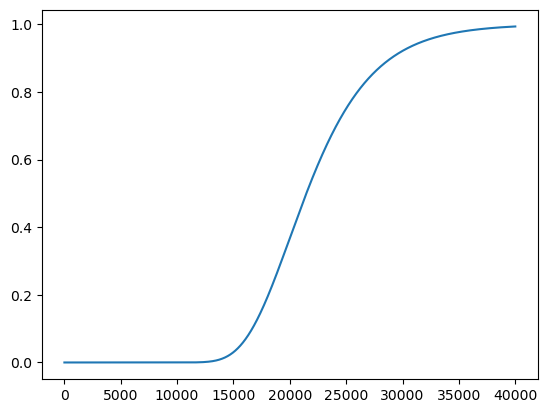

In [7]:
plot(growth_factor_list)
plt.show()


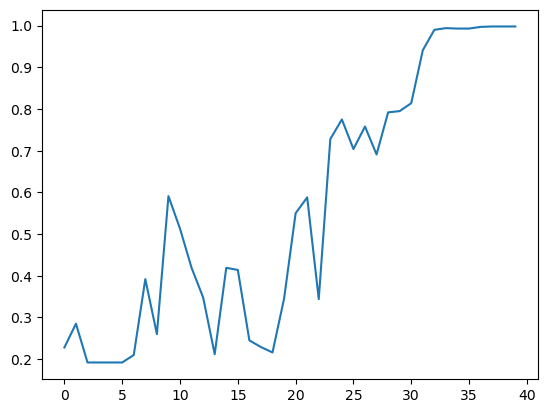

In [8]:
plot(res_hist_test)
plt.show()

In [9]:
# Prepare weights and biases

W = np.array(Srs.w).reshape(N_v+N_c, N_h)*beta_parameter
Wvh=W[:N_v,:]
Wch=W[N_v:,:]
mBv = np.array(Sbv.w)*beta_parameter*tau_rec*bias_input_rate
mBh = np.array(Sbh.w)*beta_parameter*tau_rec*bias_input_rate
b_c = mBv[N_v:(N_v+N_c)]
b_v = mBv[:N_v]
b_h = mBh
mB = np.concatenate([mBv,mBh])

Reconstruct

In [17]:
Ids = np.column_stack([
    create_single_Id(0, sequence_data, N_v = N_v, N_c = N_c, n_c_unit = n_c_unit, 
                    beta_parameter = beta_parameter, 
                    mult_class = 0.0, mult_data = 1.0) * 0,
    create_single_Id(0, sequence_data, N_v = N_v, N_c = N_c, n_c_unit = n_c_unit, 
                    beta_parameter = beta_parameter, 
                    mult_class = 0.0, mult_data = 1.0) * 0 ,
    create_single_Id(1, sequence_data, N_v = N_v, N_c = N_c, n_c_unit = n_c_unit, 
                    beta_parameter = beta_parameter, 
                    mult_class = 0.0, mult_data = 1.0),
    create_single_Id(2, sequence_data, N_v = N_v, N_c = N_c, n_c_unit = n_c_unit, 
                    beta_parameter = beta_parameter, 
                    mult_class = 1.0, mult_data = 0.0) * 0,
    create_single_Id(3, sequence_data, N_v = N_v, N_c = N_c, n_c_unit = n_c_unit, 
                    beta_parameter = beta_parameter, 
                    mult_class = 0.0, mult_data = 1.0) * 0,
    create_single_Id(4, sequence_data, N_v = N_v, N_c = N_c, n_c_unit = n_c_unit, 
                    beta_parameter = beta_parameter, 
                    mult_class = 0.0, mult_data = 1.0 ) * 0
    ]).T

In [18]:
t_ref = 0.004 * second
dcmt = 35
T = dcmt*t_ref
init_delay=dcmt*t_ref
delay=0*ms

In [42]:
def create_Id_pattern(n, data, N_v, N_c, n_c_unit, beta_parameter, on_off_ratio, seed = 0, data_mult = 1, class_mult = 0, allowed_labels = None):
    np.random.seed(seed)
    Ids = [create_single_Id(0, data, N_v = N_v, N_c = N_c, n_c_unit = n_c_unit, 
                    beta_parameter = beta_parameter, 
                    mult_class = 0.0, mult_data = 0.0)]
    labels_out = []
    if allowed_labels is None:
        labels = np.unique(data[1])
    else:
        labels = allowed_labels
    for i in range(n):
        label = np.random.choice(labels, 1)[0]
        Ids.append(create_single_Id(label, data, N_v = N_v, N_c = N_c, n_c_unit = n_c_unit, 
                    beta_parameter = beta_parameter, 
                    mult_class = class_mult, mult_data = data_mult))
        labels_out.append(label)
        for j in range(on_off_ratio):
            Ids.append(create_single_Id(0, data, N_v = N_v, N_c = N_c, n_c_unit = n_c_unit, 
                    beta_parameter = beta_parameter, 
                    mult_class = 0.0, mult_data = 0.0))
            labels_out.append(label)
    return (np.column_stack(Ids).T, labels_out)

In [41]:
# Create the parameters for the SRBM
W, b_v, b_c, b_h = create_rbm_parameters(N_v = N_v, N_c = N_c, N_h = N_h)

In [103]:
n_patterns = 5
on_off_ratio = 0
Ids, labels = create_Id_pattern(n_patterns, sequence_data, N_v = N_v, N_c = N_c, n_c_unit = n_c_unit, beta_parameter = beta_parameter, 
                        on_off_ratio = on_off_ratio, seed = 14, data_mult = 1, class_mult = 0, allowed_labels = [0, 1, 2, 3, 4])
print(Ids.shape)
print(labels[::3])

(6, 120)
[3, 1]


In [104]:
timepoints, t_sim, time_points_dict = create_timepoints(Ids, init_delay, delay, T)

In [97]:
out = main(W, b_v, b_c, b_h, t_sim = t_sim, Id = Ids, monitors = True, dorun = True, mnist_data=sequence_data, n_classes = 5)
Mh, Mv, Mc= out['Mh'], out['Mv'], out['Mc']

INFO:root:building '_cython_magic_4224af336c4be335ac84e82b911a71a1' extension
INFO:root:arm64-apple-darwin20.0.0-clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /opt/homebrew/Caskroom/miniconda/base/envs/jupyt-tf/include -arch arm64 -fPIC -O2 -isystem /opt/homebrew/Caskroom/miniconda/base/envs/jupyt-tf/include -arch arm64 -ftree-vectorize -fPIC -fPIE -fstack-protector-strong -O2 -pipe -isystem /opt/homebrew/Caskroom/miniconda/base/envs/jupyt-tf/include -D_FORTIFY_SOURCE=2 -isystem /opt/homebrew/Caskroom/miniconda/base/envs/jupyt-tf/include -I/opt/homebrew/Caskroom/miniconda/base/envs/jupyt-tf/include -I/opt/homebrew/Caskroom/miniconda/base/envs/jupyt-tf/lib/python3.9/site-packages/numpy/core/include -I/opt/homebrew/Caskroom/miniconda/base/envs/jupyt-tf/lib/python3.9/site-packages/brian2/synapses -I/opt/homebrew/Caskroom/miniconda/base/envs/jupyt-tf/include/python3.9 -c /Users/daniel/Library/Caches/cython/brian_extensions/_cython_

Train accuracy: 0.23
Test accuracy: 0.214
Train accuracy: 0.24
Test accuracy: 0.207
Train accuracy: 0.24
Test accuracy: 0.207
Train accuracy: 0.24
Test accuracy: 0.207
Train accuracy: 0.195
Test accuracy: 0.216
Train accuracy: 0.205
Test accuracy: 0.245
Train accuracy: 0.345
Test accuracy: 0.396
Train accuracy: 0.48
Test accuracy: 0.488
Train accuracy: 0.665
Test accuracy: 0.664
Train accuracy: 0.77
Test accuracy: 0.738
Train accuracy: 0.7
Test accuracy: 0.666
21.584304332733154


In [98]:
# Save the weights and biases
#save_matrices(W, Wvh, Wch, mBv, mBh, b_c, b_v, b_h, mB, date_str, date_time_str)

In [99]:
from brian2tools import *

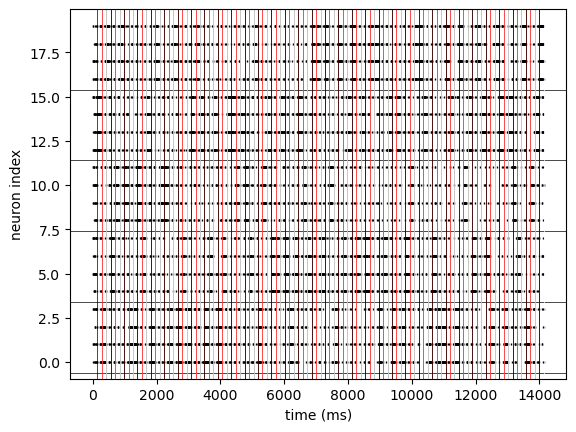

In [100]:
plot_raster(Mc.i, Mc.t, markersize=2, marker='|', color='k', mew=1)
for i in range(n_classes):
    axhline(-0.6+float(i)*4, color='k', linewidth=0.5)
color_list = ['k', '#FFFFFF', "r"]
col_cnt = 0
for i in timepoints:
    axvline(i/second*1000, color=color_list[col_cnt%len(color_list)], linewidth=0.5)
    col_cnt += 1

In [101]:
frequency_classification(Mc, n_classes, n_c_unit, t_ref=t_ref, t_start=time_points_dict["T1_s"], t_end=time_points_dict["T1_e"]*second, delay = 10)

p-value: 0.02. Confidence: High


3

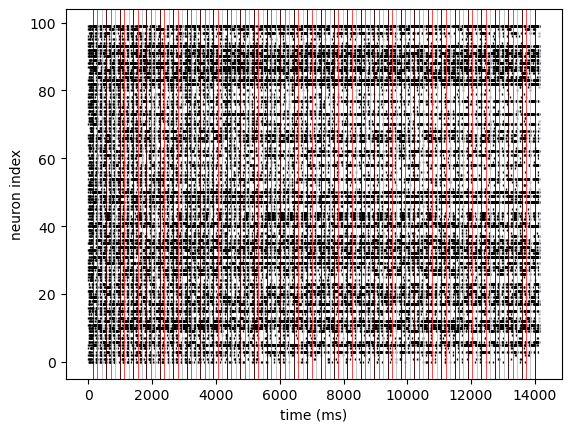

In [102]:
plot_raster(Mv.i, Mv.t, markersize=2,marker='|', color='k', mew=1)
col_cnt = 0
for i in timepoints:
    axvline(i/second*1000, color=color_list[col_cnt%len(color_list)], linewidth=0.5)
    col_cnt += 1